In [123]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxopt import solvers,matrix

In [124]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
f_digits_vec = "digits4000_txt/digits4000_digits_vec.txt"
f_digits_label = "digits4000_txt/digits4000_digits_labels.txt"
f_digits_trainset = "digits4000_txt/digits4000_trainset.txt"
f_digits_testset = "digits4000_txt/digits4000_testset.txt"

In [126]:
digits_vec = np.loadtxt(f_digits_vec)
digits_label = np.loadtxt(f_digits_label)
digits_trainset = np.loadtxt(f_digits_trainset)
digits_testset = np.loadtxt(f_digits_testset)

In [127]:
print(digits_vec.shape)
print(digits_label.shape)
print(digits_trainset.shape)
print(digits_testset.shape)

(4000, 784)
(4000,)
(2000, 2)
(2000, 2)


In [128]:
#Simple box blur algorithm: 3*3
def get_pixel_at(pixel_grid, i, j):
    num_rows = 0
    num_columns = 0
    
    pixel_val = 0
    
    num_rows = len(pixel_grid)
    if i >= 0:
        num_columns = len(pixel_grid[0])
    
    if i >= 0 and i < num_rows and j >= 0 and j < num_columns:
        pixel_val = pixel_grid[i][j]
    
    return pixel_val

def average_of_surrounding(pixel_grid, i, j):
    pixel_sum = 0
    for row in range(i - 1, i + 1 + 1):
        for column in range(j - 1, j + 1 +1):
                pixel_sum = pixel_sum + get_pixel_at(pixel_grid, row, column)              
    return int(pixel_sum / 9)

def blur(pixel_grid):
   #test_grid2 = list(test_grid)
    new_pixel = []
    for row in range(0, len(pixel_grid)):
        new_row = []
        for col in range(0, len(pixel_grid[row])):
            new_row.append(average_of_surrounding(pixel_grid, row, col))
        new_pixel.append(new_row)
    return new_pixel

In [129]:
#Testing
test_grid = [
        [10, 10, 10, 10],
        [10, 10, 10, 10],
        [10, 10, 10, 10],
        [10, 10, 10, 10],
        [10, 10, 10, 10]
]
print(blur(test_grid))

[[4, 6, 6, 4], [6, 10, 10, 6], [6, 10, 10, 6], [6, 10, 10, 6], [4, 6, 6, 4]]


Before Blurring


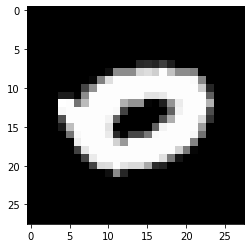

After Blurring


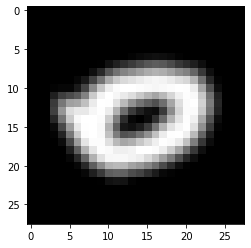

In [130]:
#Before Blurring
print("Before Blurring")
first_image = digits_vec[100]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

blur_image = np.array(blur(pixels.tolist()))
print("After Blurring")
plt.imshow(blur_image, cmap='gray')
plt.show()

In [131]:
#Blurring all training data and test data set

new_blur_digits_list = []
for row in range(0, len(digits_vec)):
    one_digit = digits_vec[row].reshape((28, 28))
    blur_one_digit = np.array(blur(one_digit.tolist())).reshape(784,)
    new_blur_digits_list.append(blur_one_digit)

new_blur_digits = np.array(new_blur_digits_list)    

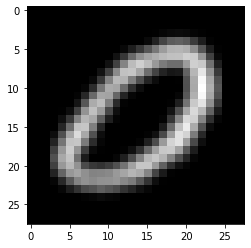

In [171]:
plt.imshow(new_blur_digits[2].reshape((28, 28)), cmap='gray')
plt.show()

In [154]:
# test_size: what proportion of original data is used for test set
#train_img, test_img, train_lbl, test_lbl = train_test_split(
#    digits_vec, digits_label, test_size=1/5.0, random_state=0)
train_img, test_img, train_lbl, test_lbl = train_test_split(
    new_blur_digits, digits_label, test_size=1/5.0, random_state=0)

In [155]:
print(train_img.shape)
print(test_img.shape)

(3200, 784)
(800, 784)


In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [157]:
#Compare the performance between different kernals, and then select the best one
from sklearn.svm import SVC
#polynomial
svclassifier_poly = SVC(kernel='poly', degree=8)
svclassifier_poly.fit(train_img, train_lbl)
#Gaussian Kernel
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(train_img, train_lbl)
#sigmoid Kernel
svclassifier_sigmoid = SVC(kernel='sigmoid')
svclassifier_sigmoid.fit(train_img, train_lbl)


/Users/alfred/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/alfred/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/alfred/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [158]:
test_pred_poly = svclassifier_poly.predict(test_img)
test_pred_rbf = svclassifier_rbf.predict(test_img)
test_pred_sigmoid = svclassifier_sigmoid.predict(test_img)

In [160]:
print(confusion_matrix(test_lbl, test_pred_poly))
print(classification_report(test_lbl, test_pred_poly))

[[26 55  0  0  0  0  0  0  0  0]
 [ 0 80  0  0  0  0  0  0  0  0]
 [ 0 67 28  2  0  0  0  0  0  0]
 [ 0 56  1  7  0  0  0  0  0  0]
 [ 0 81  0  0  5  0  0  1  0  0]
 [ 0 73  0  0  0  8  1  0  0  0]
 [ 0 61  1  0  0  1 22  0  0  0]
 [ 0 45  0  0  0  0  0 17  0  0]
 [ 1 72  1  0  0  4  0  1  3  0]
 [ 0 76  1  0  0  0  0  1  0  2]]
              precision    recall  f1-score   support

         0.0       0.96      0.32      0.48        81
         1.0       0.12      1.00      0.21        80
         2.0       0.88      0.29      0.43        97
         3.0       0.78      0.11      0.19        64
         4.0       1.00      0.06      0.11        87
         5.0       0.62      0.10      0.17        82
         6.0       0.96      0.26      0.41        85
         7.0       0.85      0.27      0.41        62
         8.0       1.00      0.04      0.07        82
         9.0       1.00      0.03      0.05        80

    accuracy                           0.25       800
   macro avg       

In [161]:
print(confusion_matrix(test_lbl, test_pred_rbf))
print(classification_report(test_lbl, test_pred_rbf))

[[80  0  0  0  0  0  1  0  0  0]
 [ 0 79  1  0  0  0  0  0  0  0]
 [ 0  0 92  2  1  0  0  2  0  0]
 [ 0  0  5 54  1  2  1  0  0  1]
 [ 0  0  4  0 78  0  1  0  1  3]
 [ 0  0  1  1  2 74  3  0  0  1]
 [ 0  0  2  0  0  0 83  0  0  0]
 [ 1  0  1  0  0  0  0 58  0  2]
 [ 1  0  3  1  1  1  1  1 73  0]
 [ 0  1  2  2  0  0  0  2  1 72]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        81
         1.0       0.99      0.99      0.99        80
         2.0       0.83      0.95      0.88        97
         3.0       0.90      0.84      0.87        64
         4.0       0.94      0.90      0.92        87
         5.0       0.96      0.90      0.93        82
         6.0       0.92      0.98      0.95        85
         7.0       0.92      0.94      0.93        62
         8.0       0.97      0.89      0.93        82
         9.0       0.91      0.90      0.91        80

    accuracy                           0.93       800
   macro avg       

In [162]:
print(confusion_matrix(test_lbl, test_pred_sigmoid))
print(classification_report(test_lbl, test_pred_sigmoid))

[[78  0  1  0  0  0  2  0  0  0]
 [ 0 78  0  0  0  0  0  0  2  0]
 [ 2  1 87  4  1  0  2  0  0  0]
 [ 0  1  1 54  0  2  1  1  3  1]
 [ 0  0  3  0 75  0  2  0  1  6]
 [ 1  2  1  4  7 62  3  0  1  1]
 [ 2  0  2  0  1  0 80  0  0  0]
 [ 1  0  0  0  0  0  0 58  0  3]
 [ 3  2  1  2  2  4  0  0 68  0]
 [ 0  1  2  2  3  1  0  2  2 67]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        81
         1.0       0.92      0.97      0.95        80
         2.0       0.89      0.90      0.89        97
         3.0       0.82      0.84      0.83        64
         4.0       0.84      0.86      0.85        87
         5.0       0.90      0.76      0.82        82
         6.0       0.89      0.94      0.91        85
         7.0       0.95      0.94      0.94        62
         8.0       0.88      0.83      0.86        82
         9.0       0.86      0.84      0.85        80

    accuracy                           0.88       800
   macro avg       

Refer to the above result, the accuracy of SVM with using Gaussian Kernel is the best.
So we start the do the parameter tunning on the SVM with Gaussian Kernal

In [163]:
#Use GridSearchCV to do Cross Validation, select the best parameters on C, gamma
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(train_img, train_lbl) 

/Users/alfred/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.106, total=  10.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.106, total=  11.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.105, total=  11.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.106, total=  10.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.106, total=   9.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.105, total=  10.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.325, total=   9.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.336, total=   9.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.336, total=   9.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  7.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [164]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [165]:
from datetime import datetime, time
def date_diff_in_milliseconds(dt2, dt1):
  timedelta = dt2 - dt1
  return timedelta.total_seconds() * 1000

In [166]:
#Gaussian Kernel
starttime = datetime.now()

svclassifier_rbf_tune = SVC(probability=False, kernel='rbf', C=10, gamma=0.001)
svclassifier_rbf_tune.fit(train_img, train_lbl)

endtime = datetime.now()
print(date_diff_in_milliseconds(endtime, starttime))


3770.037


In [167]:
test_pred_rbf_tune = svclassifier_rbf_tune.predict(test_img)

In [168]:
print(confusion_matrix(test_lbl, test_pred_rbf_tune))
print(classification_report(test_lbl, test_pred_rbf_tune))

[[79  0  0  0  0  1  1  0  0  0]
 [ 0 77  2  0  0  0  0  1  0  0]
 [ 0  0 91  1  2  0  0  3  0  0]
 [ 0  0  3 55  0  3  0  2  1  0]
 [ 0  0  3  0 77  0  2  1  1  3]
 [ 0  0  0  2  3 75  2  0  0  0]
 [ 0  0  2  0  1  1 81  0  0  0]
 [ 0  0  0  0  0  0  1 60  0  1]
 [ 1  0  3  2  0  1  1  0 74  0]
 [ 0  1  0  0  1  2  0  2  0 74]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        81
         1.0       0.99      0.96      0.97        80
         2.0       0.88      0.94      0.91        97
         3.0       0.92      0.86      0.89        64
         4.0       0.92      0.89      0.90        87
         5.0       0.90      0.91      0.91        82
         6.0       0.92      0.95      0.94        85
         7.0       0.87      0.97      0.92        62
         8.0       0.97      0.90      0.94        82
         9.0       0.95      0.93      0.94        80

    accuracy                           0.93       800
   macro avg       

The accuracy has been improved to 0.93 after parameter tunning. 